# Image data handling
opencv 라이브러리를 이용해서 이미지 데이터를 다룹니다.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

이미지를 읽습니다.

컬러 이미지의 경우 opencv와 matplotlib가 처리하는 채널 순서가 다르기 때문에 채널 순서를 바꾸어야 올바른 영상을 출력할 수 있습니다.

레나 이미지는 영상처리 분야의 표준으로 사용되는 이미지 입니다.

참고(야공만-레나편)
https://www.facebook.com/engineertoon/posts/489096361277224

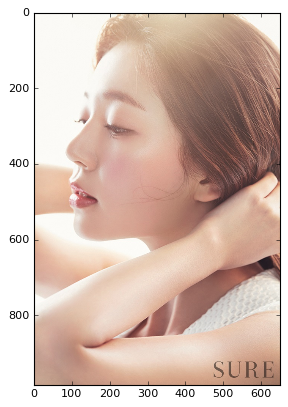

In [3]:
np_bgr_image = cv2.imread('./data/lena2.png', 1) # color mode, 0 is gray scale
np_rgb_image = cv2.cvtColor(np_bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(np_rgb_image)
plt.show()

In [4]:
### image shape
print ('image shape:', np_bgr_image.shape) #(height, width, channel)
### data type
print ('image data type:', np_bgr_image.dtype) # np.uint8, np.float32
print ('image data type:', type(np_bgr_image)) 

('image shape:', (983, 651, 3))
('image data type:', dtype('uint8'))
('image data type:', <type 'numpy.ndarray'>)


('resized image shape:', (491, 325, 3))


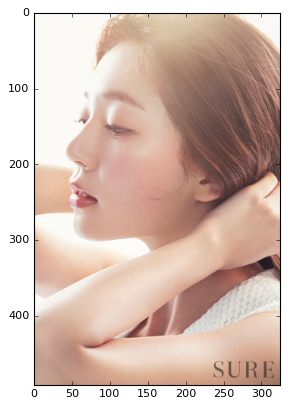

In [5]:
### resize
height, width = np_rgb_image.shape[:2]
resized_image = cv2.resize(np_rgb_image, (int(width/2), int(height/2))
print ('resized image shape:', resized_image.shape)
plt.imshow(resized_image)
plt.show()

('translated image shape:', (983, 651, 3))


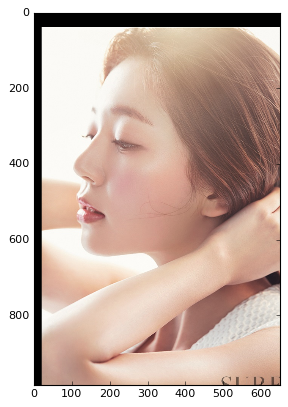

In [6]:
### Translation
# translation matrix, X: 20, Y: 40
M = np.float32([[1,0,20],[0,1,40]])
tranlated_image = cv2.warpAffine(np_rgb_image, M,(width, height))

print ('translated image shape:', tranlated_image.shape)
plt.imshow(tranlated_image)
plt.show()

('rotated image shape:', (983, 651, 3))


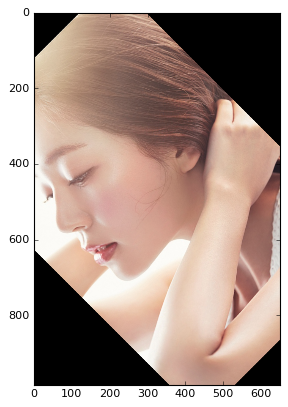

In [7]:
### Rotation
# rotate 45 degrees from the center of the image.
M= cv2.getRotationMatrix2D((width/2, height/2), 45, 1)
rotated_image = cv2.warpAffine(np_rgb_image, M, (width, height))

print ('rotated image shape:',rotated_image.shape)
plt.imshow(rotated_image)
plt.show()

('gradient image shape:', (983, 651))


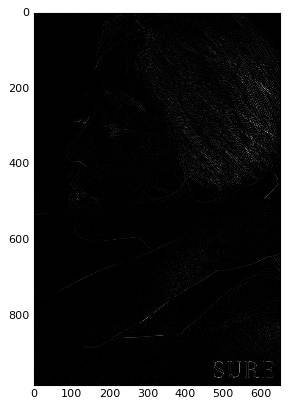

In [8]:
### Laplacian edge detection
# The second derivative of the gradient for the width and height of the image.
np_gray_image = cv2.cvtColor(np_bgr_image, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(np_gray_image, cv2.CV_8U)
print ('gradient image shape:',laplacian.shape)
plt.imshow(laplacian, cmap='gray')
plt.show()

In [9]:
### save the result
cv2.imwrite('./edge_lena.png', laplacian)

True